# SCHOTASTIC PROCESSES AND MARKOV CHAINS

By definition, the Schotatastic process is defined as 'a collection or ensemble of random variables indexed by a variable t, usually representing time'. This definition comes straight from looking up 'the schotastic process' using your typical search engine, but what does this definition really mean? Lets look at a few examples.

In [2]:
import numpy as np
from scipy import special
from scipy import stats
from scipy import linalg
import pandas as pd
import random as rm

# Random Walk (Non-Schotastic process)

Lets first take a look at a simple non-schotastic process.

In [3]:
def randomwalk(p,n = 10):
    startingpoint = 0 
    currentpoint = 0
    xk = [-1,1]
    pk = (1-p,p)
    custom = stats.rv_discrete(name='custm', values=(xk, pk))
    for i in np.arange(n):
        print(currentpoint)
        currentpoint += custom.rvs(0)
    print(currentpoint)
    print('In',n, 'trials, we have landed on' ,currentpoint )


randomwalk(.5)

0
-1
0
-1
-2
-1
-2
-1
0
1
2
In 10 trials, we have landed on 2


We call this process the 'Random Walk' process. Imagine a person standing on a number line that ranges from (-inf,inf) starting at the point 0. At each step, the person moves to the right with probability p, and left with probability 1-p in n trials. Fairly simple right?

# Random Walk (Schotastic process)

Now lets take a look the Schotastic version of a Random Walk. From our Non-Schotastic Random Walk, we are pulling our p values from a constant random variable that doesn't change. However, in the schotastic process, our random variables do change, and they change with respect to time or in our case below, time represents which step we are on.

In [4]:
def randomvariablechange(n):
    currentstep = n
    
    xk = [-1,1]
    pk = (1/(n+1), 1 - 1/(n+1))
    custom = stats.rv_discrete(name='custm', values=(xk, pk))
    
    
    return custom

def randomwalkschotastic(n = 10):
    startingpoint = 0 
    currentpoint = 0
    
    for i in np.arange(n):
        print(currentpoint)
        
        custom = randomvariablechange(i)
        
        currentpoint += custom.rvs(0)
    print('In' ,n, 'trials, we have landed on ', currentpoint)

    
randomwalkschotastic(1000)

0
-1
-2
-3
-2
-3
-2
-1
0
1
2
3
2
3
4
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
38
39
38
39
40
41
42
43
44
45
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
2

<b>As n approaches larger values, the probability of landing on +1 begins to converge to 1.

The main difference between these two processes is that in the schotastic process random walk, we are changing our random variable with respect to time, or in this case n. Imagine each step we take, the random variable that we pull out of changes as a function of n. We can denote this as X(n), where X is a function of n that returns a new random variable that depends on n..

# Markov Chains

Markov chain is a prime example of an schotastic process. Lets take a look at discrete Markov Chains. 

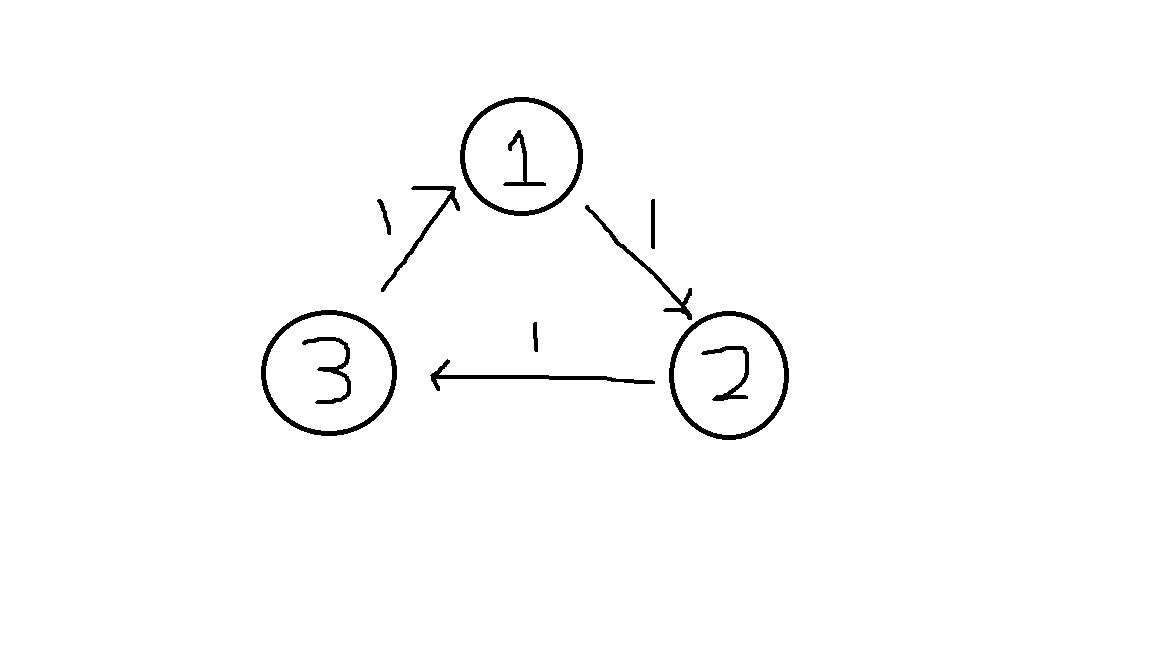

In [5]:
A = np.mat('[0 1 0;0 0 1; 1 0 0]')
A


matrix([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]])

Here we are using a 'transition matrix' to represent our Markov chain. Our current state corresponds to the row number, and the columns represent probabilities. 

# Applications with Markov Chains

Lets look at a application where we can use this 'Schotastic process'. Lets create an fairly simple markov chain model that tries to predict the party of the next president.


In [6]:
## importing our dataset using pandas

df = pd.read_csv(r'C:\Users\caryk\Downloads\US presidents listed - ALL NAMES.csv')
df = df.drop_duplicates("President")

#Dropping presidents without "Republican" or "Democrat" as their party

filtering = ['Democrat','Republican']
filtereddf = df[df["Party"].isin(filtering)]

filtereddf.head()


,Years (after inauguration),President,Party
40,1829,Andrew Jackson,Democrat
48,1837,Martin Van Buren,Democrat
57,1845,James K. Polk,Democrat
65,1853,Franklin Pierce,Democrat
69,1857,James Buchanan,Democrat


Since nowadays the chance of a president not coming out of the Republican or Democratic parties is very slim, lets take a look at presidents that are only from the Democratic or Republican parties. With our filtered dataframe, we can now create some algorithm to determine the counts of four situations in order to quantify some probabilities for our markov chain.

In [7]:
len(filtereddf['Party'])

32

In [8]:
partycolumn = filtereddf['Party']
dd = 0
dr = 0
rr = 0
rd = 0
for index, obj in enumerate(partycolumn):
    if index < len(partycolumn) - 1:
        #testing four cases
        if obj == 'Democrat' and partycolumn.iloc[index + 1] == 'Democrat':
            dd += 1
        elif obj == 'Democrat' and partycolumn.iloc[index + 1] == 'Republican':
            dr += 1
        elif  obj == 'Republican' and partycolumn.iloc[index + 1] == 'Republican':
            rr += 1
        else:
            rd += 1
            
print(dd,dr,rr,rd)
## Build our transition matrix
A = np.matrix([[6/13, 7/13], [11/18, 7/18]])
A    
            
            


6 7 11 7


matrix([[0.46153846, 0.53846154],
        [0.61111111, 0.38888889]])

# Markov Chains to predict Market trends

Here's a more applicable use of Markov Chains.


**General Overview of Market trends** 

**Bull markets**: periods of time where prices generally are rising, due to the actors
having optimistic hopes of the future.



**Bear markets**: periods of time where prices generally are declining, due to the actors
having a pessimistic view of the future.



**Stagnant markets**: periods of time where the market is characterized by neither a
decline nor rise in general prices.


Similar to above, we are using a discrete time Markov Chain with the three states above.

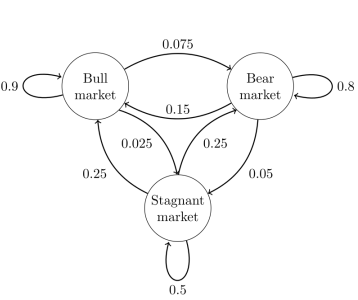

In [11]:
# Creating a pandas dataframe to represent our markov chain


d = {'' : ['Bull','Bear','Stagnant'],'Bull': [0.9,0.075,0.025], 'Bear': [0.15,0.8,0.05], 'Stagnant': [0.25,0.25,0.5]}


df = pd.DataFrame(data=d)


# Setting the index to our no names column
df.set_index('')

,Bull,Bear,Stagnant
,,,
Bull,0.900,0.15,0.25
Bear,0.075,0.80,0.25
Stagnant,0.025,0.05,0.50


Lets explain what this Markov chain is saying. Interpret the current state as the current row. For example, if we are in state 'Bull', the probability of staying in the same state is 90%. If our market is currently 'Stagnant', the probability our next state is 'Bear' is 0.05

In [9]:
# Converting data frame to matrix

Markovmarket = np.matrix([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]])

Markovmarket

matrix([[0.9  , 0.075, 0.025],
        [0.15 , 0.8  , 0.05 ],
        [0.25 , 0.25 , 0.5  ]])

**N step transition Matrix**


By definition, our Nth step transition Matrix is $X^n$, where X is our transition matrix. In other words, we are multiplying our transition matrix by itself n times. Lets take a look at our 2nd, 5th, and 10th step transition matrix using the transition matrix we created above.

In [13]:
## Using numpy's matrix multiplication
print('2nd step transtion')
np.linalg.matrix_power(Markovmarket, 2)

matrix([[0.8275 , 0.13375, 0.03875],
        [0.2675 , 0.66375, 0.06875],
        [0.3875 , 0.34375, 0.26875]])

In [14]:
## Using numpy's matrix multiplication
print('5th step transtion')
np.linalg.matrix_power(Markovmarket, 5)

5th step transtion


matrix([[0.70683 , 0.238305, 0.054865],
        [0.47661 , 0.450515, 0.072875],
        [0.54865 , 0.364375, 0.086975]])

In [15]:
## Using numpy's matrix multiplication
print('10th step transtion')
np.linalg.matrix_power(Markovmarket, 10)

10th step transtion


matrix([[0.64328888, 0.29579253, 0.06091859],
        [0.59158507, 0.34309614, 0.06531879],
        [0.60918588, 0.32659396, 0.06422016]])

**How do we interpret these Matrices?**

Lets assume this matrix uses weeks for unit time. Thus, the our transition matrix represents the 1 step transtion matrix from week n to week n+1. Now you can imagine that the xth step transition matrix represents week n to week n+x. Lets take a look at an example using the 5th step transition matrix we created above. 

In [34]:
firstrow = np.array([1,0,0])
secondrow = np.array([0,1,0])
thirdrow = np.array([0,0,1])

fifthstepmatrix = np.linalg.matrix_power(Markovmarket, 5)


fifthstepmatrix


matrix([[0.70683 , 0.238305, 0.054865],
        [0.47661 , 0.450515, 0.072875],
        [0.54865 , 0.364375, 0.086975]])

In [35]:
#Grabbing the first row
first = np.dot(firstrow,fifthstepmatrix)
# Grabbing the second row
second  = np.dot(secondrow,fifthstepmatrix)

#Grabbing the third row

third = np.dot(thirdrow,fifthstepmatrix)





print('If your starting state is Bull, then in 5 weeks, the state you will be in follows a discrete random variable with',first,)

print('If your starting state is Bear, then in 5 weeks, the state you will be in follows a discrete random variable with',second,)

print('If your starting state is Stagnant, then in 5 weeks, the state you will be in follows a discrete random variable with',third,)



If your starting state is Bull, then in 5 weeks, the state you will be in follows a discrete random variable with [[0.70683  0.238305 0.054865]]
If your starting state is Bear, then in 5 weeks, the state you will be in follows a discrete random variable with [[0.47661  0.450515 0.072875]]
If your starting state is Stagnant, then in 5 weeks, the state you will be in follows a discrete random variable with [[0.54865  0.364375 0.086975]]


# Steady states

**What happens to our Nth state transition matrix if N gets large?** Lets take a look.

In [16]:
## 10th step
np.linalg.matrix_power(Markovmarket, 5)

matrix([[0.64328888, 0.29579253, 0.06091859],
        [0.59158507, 0.34309614, 0.06531879],
        [0.60918588, 0.32659396, 0.06422016]])

In [19]:
## 20th step
np.linalg.matrix_power(Markovmarket, 10)

matrix([[0.64328888, 0.29579253, 0.06091859],
        [0.59158507, 0.34309614, 0.06531879],
        [0.60918588, 0.32659396, 0.06422016]])

In [20]:
## 10th step
np.linalg.matrix_power(Markovmarket, 15)

matrix([[0.62909654, 0.30875514, 0.06214832],
        [0.61751028, 0.31934817, 0.06314155],
        [0.62148319, 0.31570774, 0.06280907]])

In [21]:
## 10th step
np.linalg.matrix_power(Markovmarket, 20)

matrix([[0.62591777, 0.31166097, 0.06242126],
        [0.62332193, 0.31403413, 0.06264394],
        [0.62421263, 0.31321968, 0.0625677 ]])

In [22]:
np.linalg.matrix_power(Markovmarket, 25)

matrix([[0.62520562, 0.31231202, 0.06248236],
        [0.62462404, 0.3128437 , 0.06253225],
        [0.62482361, 0.31266126, 0.06251514]])

In [23]:
np.linalg.matrix_power(Markovmarket, 30)

matrix([[0.62504607, 0.31245789, 0.06249605],
        [0.62491577, 0.312577  , 0.06250723],
        [0.62496048, 0.31253613, 0.06250339]])

We notice that the columns of our matrices begin to converge to to one value. This is vector is called the steady state. However, in order for a matrix to have a steady state they must fufill two conditions. The 1 step transition matrix must be aperiodic and irreducible.



**How do we interpret the Steady state**


The same as how we interpret any nth state matrix. If I start some arbitrary state on week n, in 100 days, the random variable would simply be our steady state. If N gets large enough, the Nth step transition matrix and Nth + 1 step transition matrix will be the same. Thus, our starting state would not matter as all rows are the same.